# Regression and Other Stories: KidIQ

In [160]:
from pathlib import Path

import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_PATH = Path("../data")

In [161]:
rng = np.random.default_rng(seed=12)
az.style.use("arviz-white")

In [3]:
kidiq = pd.read_csv(DATA_PATH / "kidiq.csv")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


## A single predictor
### A single binary predictor

In [4]:
model_1 = bmb.Model('kid_score ~ mom_hs', data=kidiq)
idata_1 = model_1.fit()
az.summary(idata_1, kind='stats')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


,mean,sd,hdi_3%,hdi_97%
Intercept,77.570,2.150,73.557,81.492
mom_hs,11.740,2.387,7.351,16.204
kid_score_sigma,19.891,0.680,18.603,21.117


### A single continuous predictor

In [5]:
model_2 = bmb.Model('kid_score ~ mom_iq', data=kidiq)
idata_2 = model_2.fit()
az.summary(idata_2, kind='stats')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, mom_iq]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


,mean,sd,hdi_3%,hdi_97%
Intercept,25.856,6.013,15.140,38.038
mom_iq,0.610,0.059,0.497,0.725
kid_score_sigma,18.303,0.636,17.049,19.438


### Displaying a regression line as a function of one input variable

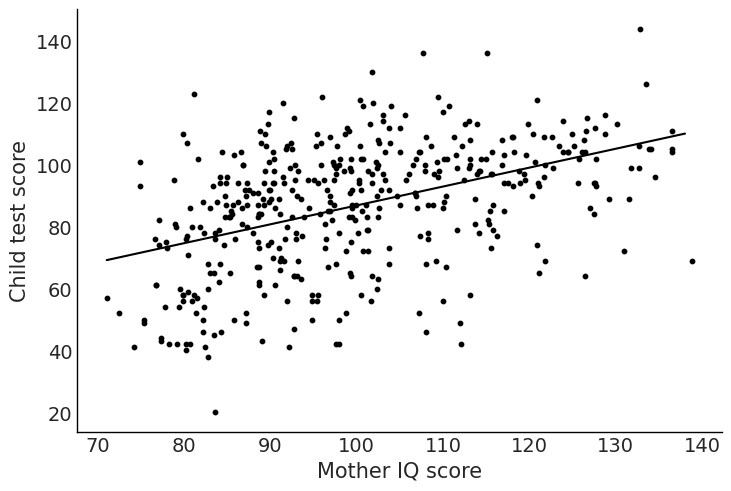

In [159]:
stats_2 = az.summary(idata_2, kind='stats')['mean']
x = np.arange(kidiq['mom_iq'].min(), kidiq['mom_iq'].max())
y_pred = stats_2.loc['Intercept'] + stats_2.loc['mom_iq'] * x

fig, ax = plt.subplots()
ax.scatter('mom_iq','kid_score', data=kidiq, color='black', s=10)
ax.set_xlabel('Mother IQ score')
ax.set_ylabel('Child test score')
ax.plot(x, y_pred, color='black')

## Two predictors
### Linear regression

In [7]:
model_3 = bmb.Model('kid_score ~ mom_hs + mom_iq', data=kidiq)
idata_3 = model_3.fit()
az.summary(idata_3, kind='stats')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, mom_iq, mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


,mean,sd,hdi_3%,hdi_97%
Intercept,25.663,5.957,14.982,37.389
mom_hs,6.003,2.233,1.849,10.022
mom_iq,0.564,0.062,0.449,0.682
kid_score_sigma,18.177,0.622,17.045,19.369


## Graphical displays of data and fitted models
### Two fitted regression lines -- model with no interaction

In [98]:
idata_3

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

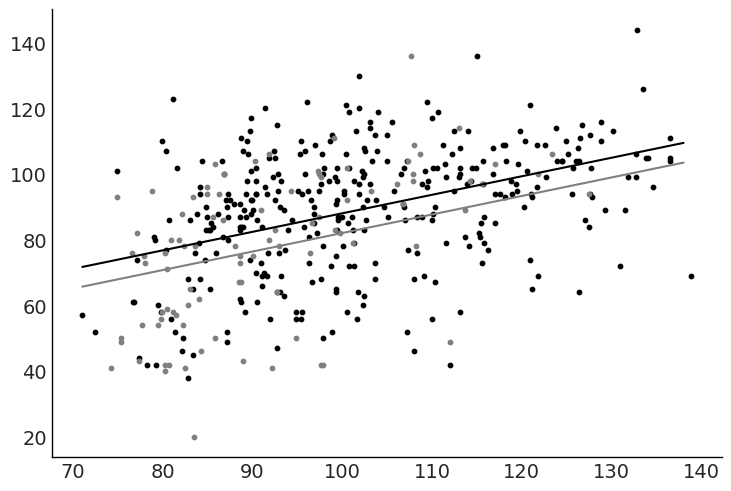

In [153]:
stats_3 = az.summary(idata_3, kind='stats')['mean']
x = np.arange(kidiq['mom_iq'].min(), kidiq['mom_iq'].max())
y_pred_mom_hs_1 = stats_3['Intercept'] + stats_3['mom_hs'] + stats_3['mom_iq'] * x
y_pred_mom_hs_0 = stats_3['Intercept'] + stats_3['mom_iq'] * x

fig, ax = plt.subplots()
ax.scatter('mom_iq','kid_score', data=kidiq.query('mom_hs == 1'), color='black', s=10)
ax.scatter('mom_iq','kid_score', data=kidiq.query('mom_hs == 0'), color='gray', s=10)
ax.plot(x, y_pred_mom_hs_1, color='black')
ax.plot(x, y_pred_mom_hs_0, color='gray')

### Two fitted regression lines -- model with interaction

In [9]:
model_4 = bmb.Model('kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq', data=kidiq)
idata_4 = model_4.fit()
az.summary(idata_4, kind='stats')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, mom_hs:mom_iq, mom_iq, mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%
Intercept,-9.258,13.717,-35.275,16.503
mom_hs,48.622,15.357,19.480,78.070
mom_iq,0.945,0.148,0.669,1.224
mom_hs:mom_iq,-0.456,0.162,-0.743,-0.129
kid_score_sigma,18.023,0.597,16.972,19.226


In [106]:
idata_4

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

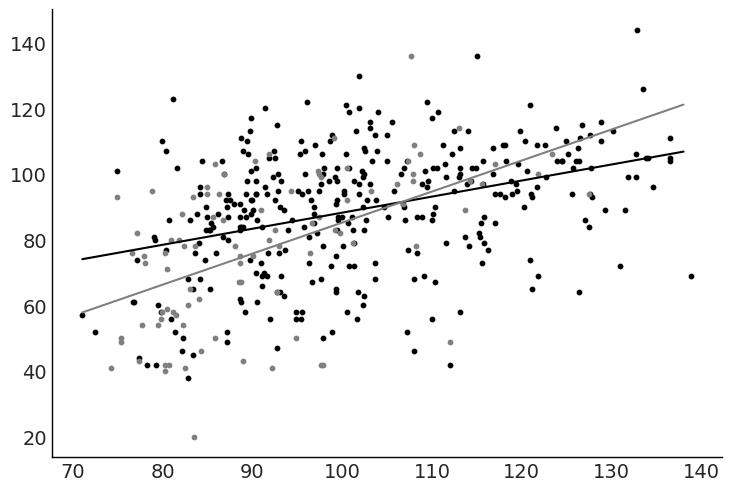

In [157]:
stats_4 = az.summary(idata_4, kind='stats')['mean']
x = np.arange(kidiq['mom_iq'].min(), kidiq['mom_iq'].max())
y_pred_mom_hs_1 = stats_4['Intercept'] + stats_4['mom_hs'] + (stats_4['mom_hs:mom_iq'] + stats_4['mom_iq']) * x
y_pred_mom_hs_0 = stats_4['Intercept'] + stats_4['mom_iq'] * x

fig, ax = plt.subplots()
ax.scatter('mom_iq','kid_score', data=kidiq.query('mom_hs == 1'), color='black', s=10)
ax.scatter('mom_iq','kid_score', data=kidiq.query('mom_hs == 0'), color='gray', s=10)
ax.plot(x, y_pred_mom_hs_1, color='black')
ax.plot(x, y_pred_mom_hs_0, color='gray');

## Displaying uncertainty in the fitted regression
### A single continuous predictor

In [11]:
az.summary(idata_2, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,25.856,6.013,15.140,38.038
mom_iq,0.610,0.059,0.497,0.725
kid_score_sigma,18.303,0.636,17.049,19.438


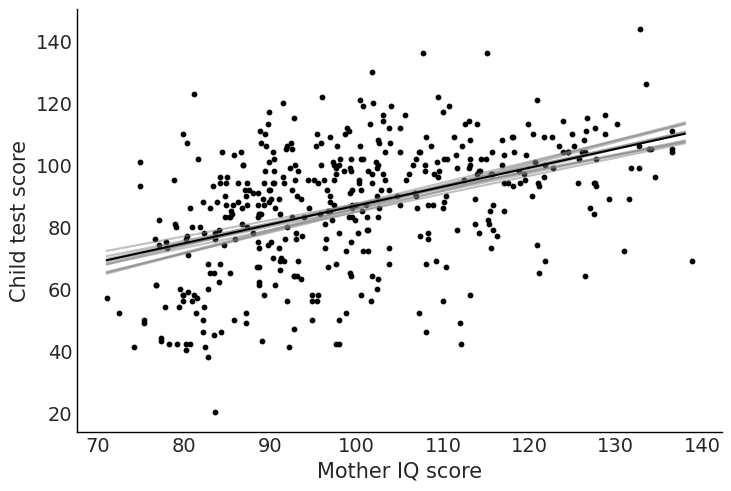

In [158]:
index = rng.choice(len(idata_2.posterior['draw'].values), 10)
intercept_sample = idata_2.posterior['Intercept'][0, index].values
slope_sample = idata_2.posterior['mom_iq'][0, index].values
x = np.arange(kidiq['mom_iq'].min(), kidiq['mom_iq'].max())
y_pred = idata_2.posterior['Intercept'].values.mean() + idata_2.posterior['mom_iq'].values.mean() * x

fig, ax = plt.subplots()
ax.scatter('mom_iq','kid_score', data=kidiq, color='black', s=10)
for intercept, slope in zip(intercept_sample, slope_sample):
    ax.plot(x, intercept + slope * x, color='gray', alpha=0.5)
ax.plot(x, y_pred, color='black')

ax.set_xlabel('Mother IQ score')
ax.set_ylabel('Child test score');

### Two predictors

In [113]:
# TODO: add plot code here

### Center predictors to have zero mean

In [94]:
kidiq["c_mom_hs"] = kidiq["mom_hs"] - kidiq["mom_hs"].mean()
kidiq["c_mom_iq"] = kidiq["mom_iq"] - kidiq["mom_iq"].mean()
model_4c = bmb.Model(
    "kid_score ~ c_mom_hs + c_mom_iq + c_mom_hs:c_mom_iq",
    data=kidiq,
)
idata_4c = model_4c.fit()
az.summary(idata_4c)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, c_mom_hs:c_mom_iq, c_mom_iq, c_mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,87.639,0.921,85.782,89.334,0.013,0.009,5338.0,3305.0,1.0
c_mom_hs,2.881,2.422,-1.519,7.724,0.038,0.029,3996.0,3275.0,1.0
c_mom_iq,0.589,0.061,0.471,0.699,0.001,0.001,3800.0,3171.0,1.0
c_mom_hs:c_mom_iq,-0.483,0.163,-0.787,-0.162,0.002,0.002,4475.0,3108.0,1.0
kid_score_sigma,18.007,0.635,16.848,19.158,0.008,0.006,5726.0,3273.0,1.0


### Center predictors based on a reference point

In [95]:
kidiq["c2_mom_hs"] = kidiq["mom_hs"] - 0.5
kidiq["c2_mom_iq"] = kidiq["mom_iq"] - 100
model_4c2 = bmb.Model(
    "kid_score ~ c2_mom_hs + c2_mom_iq + c2_mom_hs:c2_mom_iq",
    data=kidiq,
)
idata_4c2 = model_4c2.fit()
az.summary(idata_4c2)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, c2_mom_hs:c2_mom_iq, c2_mom_iq, c2_mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,86.833,1.223,84.497,89.054,0.023,0.016,2778.0,2857.0,1.0
c2_mom_hs,2.816,2.474,-1.631,7.583,0.049,0.034,2581.0,3107.0,1.0
c2_mom_iq,0.726,0.080,0.581,0.884,0.002,0.001,2095.0,2589.0,1.0
c2_mom_hs:c2_mom_iq,-0.481,0.161,-0.773,-0.168,0.003,0.002,2338.0,2808.0,1.0
kid_score_sigma,18.005,0.620,16.884,19.189,0.010,0.007,4080.0,2853.0,1.0


### Center and scale predictors to have zero mean and sd=1/2

In [96]:
kidiq["z_mom_hs"] = (kidiq["mom_hs"] - kidiq["mom_hs"].mean()) / (2 * kidiq["mom_hs"].std())
kidiq["z_mom_iq"] = (kidiq["mom_iq"] - kidiq["mom_iq"].mean()) / (2 * kidiq["mom_iq"].std())
model_4c = bmb.Model(
    "kid_score ~ z_mom_hs + z_mom_iq + z_mom_hs:z_mom_iq",
    data=kidiq,
)
idata_4c = model_4c.fit()
az.summary(idata_4c)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, z_mom_hs:z_mom_iq, z_mom_iq, z_mom_hs]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,87.633,0.910,85.898,89.290,0.011,0.008,6467.0,3363.0,1.0
z_mom_hs,2.363,1.991,-1.443,5.921,0.031,0.024,3991.0,3388.0,1.0
z_mom_iq,17.649,1.794,14.338,21.138,0.025,0.018,4974.0,2876.0,1.0
z_mom_hs:z_mom_iq,-11.858,3.955,-19.089,-4.359,0.060,0.042,4392.0,3547.0,1.0
kid_score_sigma,17.997,0.607,16.878,19.164,0.009,0.006,4773.0,3143.0,1.0


### Predict using working status of mother

In [97]:
model_5 = bmb.Model('kid_score ~ C(mom_work)', data=kidiq)
idata_5 = model_5.fit()
az.summary(idata_5, kind='stats')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [kid_score_sigma, Intercept, C(mom_work)]
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


,mean,sd,hdi_3%,hdi_97%
Intercept,81.961,2.328,77.684,86.526
C(mom_work)[2],3.896,3.145,-2.078,9.574
C(mom_work)[3],11.529,3.568,4.753,18.141
C(mom_work)[4],5.273,2.723,0.363,10.485
kid_score_sigma,20.267,0.693,18.939,21.530
